In [6]:
%matplotlib inline
import pandas as pd
import os,sys
import numpy as np
import math 
import matplotlib.pyplot as plt

In [13]:
n_test = 34

x_d = np.zeros(n_test)
y_d = np.zeros(n_test)

for i in range(n_test):
    x_d[i] = i + 1
    y_d[i] = np.sin(i + 1)

x_30 = np.empty(0)
y_30 = np.empty(0)

fl = open("test(3)_lambda0.txt", "r") 
for line in fl:
    tmp = line.split(" ")
    x_30 = np.concatenate((x_30, [float(tmp[0])]), axis = 0)
    y_30 = np.concatenate((y_30, [float(tmp[1])]), axis = 0)

fl.close()

x_31 = np.empty(0)
y_31 = np.empty(0)

fl = open("test(3)_lambda1.txt", "r") 
for line in fl:
    tmp = line.split(" ")
    x_31 = np.concatenate((x_31, [float(tmp[0])]), axis = 0)
    y_31 = np.concatenate((y_31, [float(tmp[1])]), axis = 0)

fl.close()

x_3n1 = np.empty(0)
y_3n1 = np.empty(0)

fl = open("test(3)_lambda-1.txt", "r") 
for line in fl:
    tmp = line.split(" ")
    x_3n1 = np.concatenate((x_3n1, [float(tmp[0])]), axis = 0)
    y_3n1 = np.concatenate((y_3n1, [float(tmp[1])]), axis = 0)

fl.close()

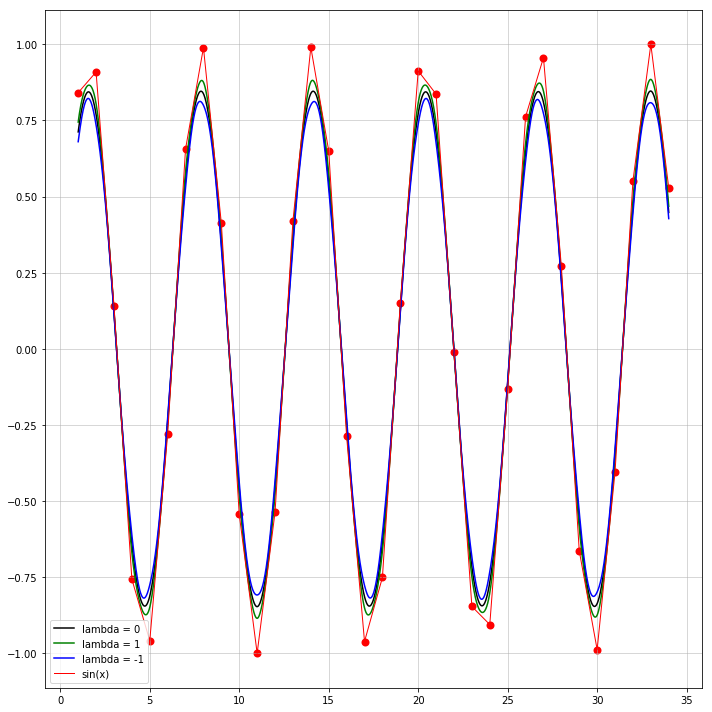

In [14]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111)

linestyles = ['-', '--', '-.']
grlinecolors = ['#000000', '#555555', '#aaaaaa']
linecolors = ['#000000', '#3163e1', '#ff9b2f']

ax.plot(x_30, y_30, lw = 1.5, color = 'k', label = 'lambda = 0')
ax.plot(x_31, y_31, lw = 1.5, color = 'g', label = 'lambda = 1')
ax.plot(x_3n1, y_3n1, lw = 1.5, color = 'b', label = 'lambda = -1')
ax.plot(x_d, np.sin(x_d), lw = 1.0, color = 'r', label = 'sin(x)')
ax.scatter(x_d, y_d, lw = 2, color = 'r')


#ax.axis('equal')
plt.grid(True, linewidth = 0.5)
plt.tight_layout()
plt.legend()
plt.show()